<a href="https://colab.research.google.com/github/phil-blu/Moisture-Content/blob/main/Copy_of_Moisture_Content_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DISCUSS QUESTION
The use of Artificial Intelligence to predict the moisture content of a fruit (apple) can be done by use of a model that is capable of predicting the moisture content of an apple given the feature parameters.

###Procedure:
A spectral camera utilises near infrared spectroscopy (NIRS) technology to measure the spectral intensity of an apple .The spectral intensity depicts the absorbtion depth of the apple using a predetermined spectral band (wavelenght). The corresponding values of absorption depth for each wavelenght forms the Features variables that can now be conveniently used to predict the moisture content of the apple having implemented a suitable model from the variety provided within the code.
Hence, 
* X = absorption depth for each given wavelength
* Y = moisture content to be 
determined

### Application
This project finds application in the manufacturing industry among other areas.
Since the level of freshness of fruits and vegetables are determined to a large extent by the relative amount of moisture contained in them, it follows that large manufacturing indusries can automate the fruit selection process to make sure that only fresh fruits/vegetables can be processed.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing dataset
df = pd.read_excel("/content/drive/My Drive/Dataset NIR Spectrum of Animal Feed.xlsx")
df.head(10)

,DATASET OF ANIMAL FEED SPECTRUM AND THEIR QUALITY PARAMETERS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 1522,Unnamed: 1523,Unnamed: 1524,Unnamed: 1525,Unnamed: 1526,Unnamed: 1527,Unnamed: 1528,Unnamed: 1529,Unnamed: 1530,Unnamed: 1531,Unnamed: 1532,Unnamed: 1533,Unnamed: 1534,Unnamed: 1535,Unnamed: 1536,Unnamed: 1537,Unnamed: 1538,Unnamed: 1539,Unnamed: 1540,Unnamed: 1541,Unnamed: 1542,Unnamed: 1543,Unnamed: 1544,Unnamed: 1545,Unnamed: 1546,Unnamed: 1547,Unnamed: 1548,Unnamed: 1549,Unnamed: 1550,Unnamed: 1551,Unnamed: 1552,Unnamed: 1553,Unnamed: 1554,Unnamed: 1555,Unnamed: 1556,Unnamed: 1557,Unnamed: 1558,Unnamed: 1559,Unnamed: 1560,Unnamed: 1561
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No.,Wavelengths (nm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,samples,999.9,1000.3,1000.700000,1001.100000,1001.400000,1001.800000,1002.200000,1002.600000,1003.000000,1003.400000,1003.800000,1004.200000,1004.500000,1004.900000,1005.300000,1005.700000,1006.100000,1006.500000,1006.900000,1007.300000,1007.700000,1008.100000,1008.500000,1008.800000,1009.200000,1009.600000,1010.000000,1010.400000,1010.800000,1011.200000,1011.600000,1012.000000,1012.400000,1012.800000,1013.200000,1013.600000,1014.000000,1014.400000,1014.800000,...,2418.600000,2420.900000,2423.100000,2425.400000,2427.700000,2429.900000,2432.200000,2434.500000,2436.800000,2439.100000,2441.400000,2443.700000,2446.000000,2448.300000,2450.600000,2452.900000,2455.200000,2457.600000,2459.900000,2462.200000,2464.600000,2466.900000,2469.300000,2471.600000,2474.000000,2476.300000,2478.700000,2481.100000,2483.500000,2485.800000,2488.200000,2490.600000,2493.000000,2495.400000,2497.800000,2500.200000,IVOMD,IVDMD,NDF,ADF
3,1,0.3344,0.333951,0.333975,0.334253,0.334334,0.333811,0.333808,0.333986,0.333640,0.332990,0.332993,0.333244,0.333277,0.333357,0.333157,0.332620,0.332620,0.332499,0.332391,0.332147,0.332380,0.332262,0.332290,0.332557,0.332441,0.332237,0.332098,0.332199,0.332285,0.331828,0.331782,0.331829,0.331834,0.331733,0.331541,0.331852,0.331691,0.331421,0.331551,...,0.981560,0.982898,0.983208,0.983416,0.985208,0.989143,0.994262,0.998972,1.002542,1.004807,1.005210,1.003902,1.001159,0.998142,0.996270,0.996162,0.997433,0.999383,1.001174,1.002158,1.003176,1.004665,1.005941,1.007141,1.008665,1.010002,1.010848,1.012057,1.013692,1.014566,1.013554,1.011503,1.009936,1.008792,1.007933,1.007107,51.69,50.5,24.98,18.1
4,2,0.331015,0.330539,0.330626,0.331188,0.331278,0.330884,0.331033,0.331525,0.331207,0.330516,0.330426,0.330351,0.330230,0.330313,0.330147,0.329783,0.329702,0.329770,0.329956,0.329850,0.330089,0.330078,0.330048,0.329813,0.329461,0.329664,0.329756,0.329773,0.329228,0.328874,0.329046,0.329058,0.329236,0.329260,0.328790,0.328970,0.329300,0.328885,0.328607,...,0.991853,0.993105,0.993279,0.993358,0.995129,0.999465,1.005159,1.010073,1.013829,1.016130,1.016298,1.014404,1.010734,1.006842,1.004119,1.003341,1.004095,1.005769,1.007266,1.008048,1.009106,1.010408,1.011610,1.012650,1.014184,1.015734,1.016605,1.017554,1.019159,1.02

### DATA CLEANING 

In [ ]:
#After dropping null values, we have:
df = df.dropna()
df.head()

,DATASET OF ANIMAL FEED SPECTRUM AND THEIR QUALITY PARAMETERS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 1522,Unnamed: 1523,Unnamed: 1524,Unnamed: 1525,Unnamed: 1526,Unnamed: 1527,Unnamed: 1528,Unnamed: 1529,Unnamed: 1530,Unnamed: 1531,Unnamed: 1532,Unnamed: 1533,Unnamed: 1534,Unnamed: 1535,Unnamed: 1536,Unnamed: 1537,Unnamed: 1538,Unnamed: 1539,Unnamed: 1540,Unnamed: 1541,Unnamed: 1542,Unnamed: 1543,Unnamed: 1544,Unnamed: 1545,Unnamed: 1546,Unnamed: 1547,Unnamed: 1548,Unnamed: 1549,Unnamed: 1550,Unnamed: 1551,Unnamed: 1552,Unnamed: 1553,Unnamed: 1554,Unnamed: 1555,Unnamed: 1556,Unnamed: 1557,Unnamed: 1558,Unnamed: 1559,Unnamed: 1560,Unnamed: 1561
2,samples,999.9,1000.3,1000.700000,1001.100000,1001.400000,1001.800000,1002.200000,1002.600000,1003.000000,1003.400000,1003.800000,1004.200000,1004.500000,1004.900000,1005.300000,1005.700000,1006.100000,1006.500000,1006.900000,1007.300000,1007.700000,1008.100000,1008.500000,1008.800000,1009.200000,1009.600000,1010.000000,1010.400000,1010.800000,1011.200000,1011.600000,1012.000000,1012.400000,1012.800000,1013.200000,1013.600000,1014.000000,1014.400000,1014.800000,...,2418.600000,2420.900000,2423.100000,2425.400000,2427.700000,2429.900000,2432.200000,2434.500000,2436.800000,2439.100000,2441.400000,2443.700000,2446.000000,2448.300000,2450.600000,2452.900000,2455.200000,2457.600000,2459.900000,2462.200000,2464.600000,2466.900000,2469.300000,2471.600000,2474.000000,2476.300000,2478.700000,2481.100000,2483.500000,2485.800000,2488.200000,2490.600000,2493.000000,2495.400000,2497.800000,2500.200000,IVOMD,IVDMD,NDF,ADF
3,1,0.3344,0.333951,0.333975,0.334253,0.334334,0.333811,0.333808,0.333986,0.333640,0.332990,0.332993,0.333244,0.333277,0.333357,0.333157,0.332620,0.332620,0.332499,0.332391,0.332147,0.332380,0.332262,0.332290,0.332557,0.332441,0.332237,0.332098,0.332199,0.332285,0.331828,0.331782,0.331829,0.331834,0.331733,0.331541,0.331852,0.331691,0.331421,0.331551,...,0.981560,0.982898,0.983208,0.983416,0.985208,0.989143,0.994262,0.998972,1.002542,1.004807,1.005210,1.003902,1.001159,0.998142,0.996270,0.996162,0.997433,0.999383,1.001174,1.002158,1.003176,1.004665,1.005941,1.007141,1.008665,1.010002,1.010848,1.012057,1.013692,1.014566,1.013554,1.011503,1.009936,1.008792,1.007933,1.007107,51.69,50.5,24.98,18.1
4,2,0.331015,0.330539,0.330626,0.331188,0.331278,0.330884,0.331033,0.331525,0.331207,0.330516,0.330426,0.330351,0.330230,0.330313,0.330147,0.329783,0.329702,0.329770,0.329956,0.329850,0.330089,0.330078,0.330048,0.329813,0.329461,0.329664,0.329756,0.329773,0.329228,0.328874,0.329046,0.329058,0.329236,0.329260,0.328790,0.328970,0.329300,0.328885,0.328607,...,0.991853,0.993105,0.993279,0.993358,0.995129,0.999465,1.005159,1.010073,1.013829,1.016130,1.016298,1.014404,1.010734,1.006842,1.004119,1.003341,1.004095,1.005769,1.007266,1.008048,1.009106,1.010408,1.011610,1.012650,1.014184,1.015734,1.016605,1.017554,1.019159,1.020301,1.019158,1.016673,1.014610,1.013049,1.012243,1.011416,52.97,50.35,32.06,18.65
5,3,0.328413,0.327891,0.327994,0.328306,0.328105,0.327753,0.327832,0.328038,0.327956,0.327581,0.327393,0.327253,0.326998,0.327070,0.327254,0.327078,0.327068,0.326829,0.326730,0.326876,0.327115,0.326898,0.326726,0.326560,0.326304,0.326741,0.326811,0.326512,0.326046,0.325759,0.325756,0.325883,0.325884,0.325855,0.325748,0.325808,0.325962,0.325661,0.325548,...,0.987479,0.988578,0.988783,0.989105,0.991017,0.995187,1.000415,1.005361,1.009131,1.011344,1.011530,1.009599,1.005875,1.001694,0.998824,0.998084,0.998922,1.000697,1.002333,1.003092,1.003816,1.005155,1.006413,1.007336,1.00871

In [ ]:
#Setting the first row as columns
df = df.rename(columns=df.iloc[0])
df.head()

,samples,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003.0,1003.4,1003.8,1004.2,1004.5,1004.9,1005.3,1005.7,1006.1,1006.5,1006.9,1007.3,1007.7,1008.1,1008.5,1008.8,1009.2,1009.6,1010.0,1010.4,1010.8,1011.2,1011.6,1012.0,1012.4,1012.8,1013.2,1013.6,1014.0,1014.4,1014.8,...,2418.6,2420.9,2423.1,2425.4,2427.7,2429.9,2432.2,2434.5,2436.8,2439.1,2441.4,2443.7,2446.0,2448.3,2450.6,2452.9,2455.2,2457.6,2459.9,2462.2,2464.6,2466.9,2469.3,2471.6,2474.0,2476.3,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493.0,2495.4,2497.8,2500.2,IVOMD,IVDMD,NDF,ADF
2,samples,999.9,1000.3,1000.700000,1001.100000,1001.400000,1001.800000,1002.200000,1002.600000,1003.000000,1003.400000,1003.800000,1004.200000,1004.500000,1004.900000,1005.300000,1005.700000,1006.100000,1006.500000,1006.900000,1007.300000,1007.700000,1008.100000,1008.500000,1008.800000,1009.200000,1009.600000,1010.000000,1010.400000,1010.800000,1011.200000,1011.600000,1012.000000,1012.400000,1012.800000,1013.200000,1013.600000,1014.000000,1014.400000,1014.800000,...,2418.600000,2420.900000,2423.100000,2425.400000,2427.700000,2429.900000,2432.200000,2434.500000,2436.800000,2439.100000,2441.400000,2443.700000,2446.000000,2448.300000,2450.600000,2452.900000,2455.200000,2457.600000,2459.900000,2462.200000,2464.600000,2466.900000,2469.300000,2471.600000,2474.000000,2476.300000,2478.700000,2481.100000,2483.500000,2485.800000,2488.200000,2490.600000,2493.000000,2495.400000,2497.800000,2500.200000,IVOMD,IVDMD,NDF,ADF
3,1,0.3344,0.333951,0.333975,0.334253,0.334334,0.333811,0.333808,0.333986,0.333640,0.332990,0.332993,0.333244,0.333277,0.333357,0.333157,0.332620,0.332620,0.332499,0.332391,0.332147,0.332380,0.332262,0.332290,0.332557,0.332441,0.332237,0.332098,0.332199,0.332285,0.331828,0.331782,0.331829,0.331834,0.331733,0.331541,0.331852,0.331691,0.331421,0.331551,...,0.981560,0.982898,0.983208,0.983416,0.985208,0.989143,0.994262,0.998972,1.002542,1.004807,1.005210,1.003902,1.001159,0.998142,0.996270,0.996162,0.997433,0.999383,1.001174,1.002158,1.003176,1.004665,1.005941,1.007141,1.008665,1.010002,1.010848,1.012057,1.013692,1.014566,1.013554,1.011503,1.009936,1.008792,1.007933,1.007107,51.69,50.5,24.98,18.1
4,2,0.331015,0.330539,0.330626,0.331188,0.331278,0.330884,0.331033,0.331525,0.331207,0.330516,0.330426,0.330351,0.330230,0.330313,0.330147,0.329783,0.329702,0.329770,0.329956,0.329850,0.330089,0.330078,0.330048,0.329813,0.329461,0.329664,0.329756,0.329773,0.329228,0.328874,0.329046,0.329058,0.329236,0.329260,0.328790,0.328970,0.329300,0.328885,0.328607,...,0.991853,0.993105,0.993279,0.993358,0.995129,0.999465,1.005159,1.010073,1.013829,1.016130,1.016298,1.014404,1.010734,1.006842,1.004119,1.003341,1.004095,1.005769,1.007266,1.008048,1.009106,1.010408,1.011610,1.012650,1.014184,1.015734,1.016605,1.017554,1.019159,1.020301,1.019158,1.016673,1.014610,1.013049,1.012243,1.011416,52.97,50.35,32.06,18.65
5,3,0.328413,0.327891,0.327994,0.328306,0.328105,0.327753,0.327832,0.328038,0.327956,0.327581,0.327393,0.327253,0.326998,0.327070,0.327254,0.327078,0.327068,0.326829,0.326730,0.326876,0.327115,0.326898,0.326726,0.326560,0.326304,0.326741,0.326811,0.326512,0.326046,0.325759,0.325756,0.325883,0.325884,0.325855,0.325748,0.325808,0.325962,0.325661,0.325548,...,0.987479,0.988578,0.988783,0.989105,0.991017,0.995187,1.000415,1.005361,1.009131,1.011344,1.011530,1.009599,1.005875,1.001694,0.998824,0.998084,0.998922,1.000697,1.002333,1.003092,1.003816,1.005155,1.006413,1.007336,1.008712,1.010192,1.010864,1.011899,1.013540,1.014654,1.013536,1.010929,1.008814,1.007408,1.006742,1.005864,52.19,49.99,49.77,17.09
6,4,0.364254,0.363403,0.363423,0.363432,0.363354,0.363343,0.363603,0.363589,0.363664,0.363387,0.363183,0.363045,0.362893,0.362976,0.362410,0.362620,0.362818,0.362461,0.362442,0.362114,0.362130,0.362016,0.362421,0.362414,0.362297,0.362104,0.361760,0.361949,0.362391,0.362446,0.361901,0.361249,0.361092,0.360894,0.360803,0.361014,0.361252,0.361329,0.361336,...,1.033341,1.034609,1.034778,1.034929,1.037033

In [ ]:
#dropping the first row since it duplicates the columns
df = df.drop(0)
df.head()

,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003.0,1003.4,1003.8,1004.2,1004.5,1004.9,1005.3,1005.7,1006.1,1006.5,1006.9,1007.3,1007.7,1008.1,1008.5,1008.8,1009.2,1009.6,1010.0,1010.4,1010.8,1011.2,1011.6,1012.0,1012.4,1012.8,1013.2,1013.6,1014.0,1014.4,1014.8,1015.2,...,2418.6,2420.9,2423.1,2425.4,2427.7,2429.9,2432.2,2434.5,2436.8,2439.1,2441.4,2443.7,2446.0,2448.3,2450.6,2452.9,2455.2,2457.6,2459.9,2462.2,2464.6,2466.9,2469.3,2471.6,2474.0,2476.3,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493.0,2495.4,2497.8,2500.2,IVOMD,IVDMD,NDF,ADF
1,0.3344,0.333951,0.333975,0.334253,0.334334,0.333811,0.333808,0.333986,0.333640,0.332990,0.332993,0.333244,0.333277,0.333357,0.333157,0.332620,0.332620,0.332499,0.332391,0.332147,0.332380,0.332262,0.332290,0.332557,0.332441,0.332237,0.332098,0.332199,0.332285,0.331828,0.331782,0.331829,0.331834,0.331733,0.331541,0.331852,0.331691,0.331421,0.331551,0.331439,...,0.981560,0.982898,0.983208,0.983416,0.985208,0.989143,0.994262,0.998972,1.002542,1.004807,1.005210,1.003902,1.001159,0.998142,0.996270,0.996162,0.997433,0.999383,1.001174,1.002158,1.003176,1.004665,1.005941,1.007141,1.008665,1.010002,1.010848,1.012057,1.013692,1.014566,1.013554,1.011503,1.009936,1.008792,1.007933,1.007107,51.69,50.5,24.98,18.1
2,0.331015,0.330539,0.330626,0.331188,0.331278,0.330884,0.331033,0.331525,0.331207,0.330516,0.330426,0.330351,0.330230,0.330313,0.330147,0.329783,0.329702,0.329770,0.329956,0.329850,0.330089,0.330078,0.330048,0.329813,0.329461,0.329664,0.329756,0.329773,0.329228,0.328874,0.329046,0.329058,0.329236,0.329260,0.328790,0.328970,0.329300,0.328885,0.328607,0.328445,...,0.991853,0.993105,0.993279,0.993358,0.995129,0.999465,1.005159,1.010073,1.013829,1.016130,1.016298,1.014404,1.010734,1.006842,1.004119,1.003341,1.004095,1.005769,1.007266,1.008048,1.009106,1.010408,1.011610,1.012650,1.014184,1.015734,1.016605,1.017554,1.019159,1.020301,1.019158,1.016673,1.014610,1.013049,1.012243,1.011416,52.97,50.35,32.06,18.65
3,0.328413,0.327891,0.327994,0.328306,0.328105,0.327753,0.327832,0.328038,0.327956,0.327581,0.327393,0.327253,0.326998,0.327070,0.327254,0.327078,0.327068,0.326829,0.326730,0.326876,0.327115,0.326898,0.326726,0.326560,0.326304,0.326741,0.326811,0.326512,0.326046,0.325759,0.325756,0.325883,0.325884,0.325855,0.325748,0.325808,0.325962,0.325661,0.325548,0.325485,...,0.987479,0.988578,0.988783,0.989105,0.991017,0.995187,1.000415,1.005361,1.009131,1.011344,1.011530,1.009599,1.005875,1.001694,0.998824,0.998084,0.998922,1.000697,1.002333,1.003092,1.003816,1.005155,1.006413,1.007336,1.008712,1.010192,1.010864,1.011899,1.013540,1.014654,1.013536,1.010929,1.008814,1.007408,1.006742,1.005864,52.19,49.99,49.77,17.09
4,0.364254,0.363403,0.363423,0.363432,0.363354,0.363343,0.363603,0.363589,0.363664,0.363387,0.363183,0.363045,0.362893,0.362976,0.362410,0.362620,0.362818,0.362461,0.362442,0.362114,0.362130,0.362016,0.362421,0.362414,0.362297,0.362104,0.361760,0.361949,0.362391,0.362446,0.361901,0.361249,0.361092,0.360894,0.360803,0.361014,0.361252,0.361329,0.361336,0.360909,...,1.033341,1.034609,1.034778,1.034929,1.037033,1.041906,1.047928,1.053221,1.057002,1.059292,1.059447,1.057232,1.053146,1.048787,1.045635,1.044755,1.045496,1.047253,1.048699,1.049499,1.050591,1.052065,1.053091,1.054032,1.055486,1.057199,1.058569,1.059947,1.061680,1.063182,1.062010,1.059022,1.056672,1.055218,1.054461,1.053585,52.16,49.75,39.46,18
5,0.356825,0.356121,0.355790,0.356126,0.356066,0.355888,0.355877,0.355720,0.355841,0.355583,0.355294,0.354902,0.354920,0.355069,0.354893,0.354888,0.354929,0.354525,0.354511,0.354295,0.354129,0.354191,0.354884,0.354976,0.354672,0.354251,0.354194,0.354179,0.354350,0.354446,0.354127,0.353708,0.353640,0.353375,0.353289,0.353424,0.353420,0.353533,0.353413,0.353058,...,1.030273,1.031679,1.032160,1.032802,1.034867,1.039354,1.045311,1.050642,1.054580,1.057135,1.057578,1.055886,1.052603,1.048888,1.046272,1.045941,1.047181,1.049277,1.050994,1.052099,1.053397,1.055070,1.056713,1.058146,1.059832,1.06

In [ ]:
#dropping the samples column due to its irrevance in the analysis
df = df.drop("samples", axis=1)
df.head()

,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003.0,1003.4,1003.8,1004.2,1004.5,1004.9,1005.3,1005.7,1006.1,1006.5,1006.9,1007.3,1007.7,1008.1,1008.5,1008.8,1009.2,1009.6,1010.0,1010.4,1010.8,1011.2,1011.6,1012.0,1012.4,1012.8,1013.2,1013.6,1014.0,1014.4,1014.8,1015.2,...,2418.6,2420.9,2423.1,2425.4,2427.7,2429.9,2432.2,2434.5,2436.8,2439.1,2441.4,2443.7,2446.0,2448.3,2450.6,2452.9,2455.2,2457.6,2459.9,2462.2,2464.6,2466.9,2469.3,2471.6,2474.0,2476.3,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493.0,2495.4,2497.8,2500.2,IVOMD,IVDMD,NDF,ADF
2,999.9,1000.3,1000.700000,1001.100000,1001.400000,1001.800000,1002.200000,1002.600000,1003.000000,1003.400000,1003.800000,1004.200000,1004.500000,1004.900000,1005.300000,1005.700000,1006.100000,1006.500000,1006.900000,1007.300000,1007.700000,1008.100000,1008.500000,1008.800000,1009.200000,1009.600000,1010.000000,1010.400000,1010.800000,1011.200000,1011.600000,1012.000000,1012.400000,1012.800000,1013.200000,1013.600000,1014.000000,1014.400000,1014.800000,1015.200000,...,2418.600000,2420.900000,2423.100000,2425.400000,2427.700000,2429.900000,2432.200000,2434.500000,2436.800000,2439.100000,2441.400000,2443.700000,2446.000000,2448.300000,2450.600000,2452.900000,2455.200000,2457.600000,2459.900000,2462.200000,2464.600000,2466.900000,2469.300000,2471.600000,2474.000000,2476.300000,2478.700000,2481.100000,2483.500000,2485.800000,2488.200000,2490.600000,2493.000000,2495.400000,2497.800000,2500.200000,IVOMD,IVDMD,NDF,ADF
3,0.3344,0.333951,0.333975,0.334253,0.334334,0.333811,0.333808,0.333986,0.333640,0.332990,0.332993,0.333244,0.333277,0.333357,0.333157,0.332620,0.332620,0.332499,0.332391,0.332147,0.332380,0.332262,0.332290,0.332557,0.332441,0.332237,0.332098,0.332199,0.332285,0.331828,0.331782,0.331829,0.331834,0.331733,0.331541,0.331852,0.331691,0.331421,0.331551,0.331439,...,0.981560,0.982898,0.983208,0.983416,0.985208,0.989143,0.994262,0.998972,1.002542,1.004807,1.005210,1.003902,1.001159,0.998142,0.996270,0.996162,0.997433,0.999383,1.001174,1.002158,1.003176,1.004665,1.005941,1.007141,1.008665,1.010002,1.010848,1.012057,1.013692,1.014566,1.013554,1.011503,1.009936,1.008792,1.007933,1.007107,51.69,50.5,24.98,18.1
4,0.331015,0.330539,0.330626,0.331188,0.331278,0.330884,0.331033,0.331525,0.331207,0.330516,0.330426,0.330351,0.330230,0.330313,0.330147,0.329783,0.329702,0.329770,0.329956,0.329850,0.330089,0.330078,0.330048,0.329813,0.329461,0.329664,0.329756,0.329773,0.329228,0.328874,0.329046,0.329058,0.329236,0.329260,0.328790,0.328970,0.329300,0.328885,0.328607,0.328445,...,0.991853,0.993105,0.993279,0.993358,0.995129,0.999465,1.005159,1.010073,1.013829,1.016130,1.016298,1.014404,1.010734,1.006842,1.004119,1.003341,1.004095,1.005769,1.007266,1.008048,1.009106,1.010408,1.011610,1.012650,1.014184,1.015734,1.016605,1.017554,1.019159,1.020301,1.019158,1.016673,1.014610,1.013049,1.012243,1.011416,52.97,50.35,32.06,18.65
5,0.328413,0.327891,0.327994,0.328306,0.328105,0.327753,0.327832,0.328038,0.327956,0.327581,0.327393,0.327253,0.326998,0.327070,0.327254,0.327078,0.327068,0.326829,0.326730,0.326876,0.327115,0.326898,0.326726,0.326560,0.326304,0.326741,0.326811,0.326512,0.326046,0.325759,0.325756,0.325883,0.325884,0.325855,0.325748,0.325808,0.325962,0.325661,0.325548,0.325485,...,0.987479,0.988578,0.988783,0.989105,0.991017,0.995187,1.000415,1.005361,1.009131,1.011344,1.011530,1.009599,1.005875,1.001694,0.998824,0.998084,0.998922,1.000697,1.002333,1.003092,1.003816,1.005155,1.006413,1.007336,1.008712,1.010192,1.010864,1.011899,1.013540,1.014654,1.013536,1.010929,1.008814,1.007408,1.006742,1.005864,52.19,49.99,49.77,17.09
6,0.364254,0.363403,0.363423,0.363432,0.363354,0.363343,0.363603,0.363589,0.363664,0.363387,0.363183,0.363045,0.362893,0.362976,0.362410,0.362620,0.362818,0.362461,0.362442,0.362114,0.362130,0.362016,0.362421,0.362414,0.362297,0.362104,0.361760,0.361949,0.362391,0.362446,0.361901,0.361249,0.361092,0.360894,0.360803,0.361014,0.361252,0.361329,0.361336,0.360909,...,1.033341,1.03

In [ ]:
#Resetting index
df = df.reset_index()
df.head()

,index,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003.0,1003.4,1003.8,1004.2,1004.5,1004.9,1005.3,1005.7,1006.1,1006.5,1006.9,1007.3,1007.7,1008.1,1008.5,1008.8,1009.2,1009.6,1010.0,1010.4,1010.8,1011.2,1011.6,1012.0,1012.4,1012.8,1013.2,1013.6,1014.0,1014.4,1014.8,...,2418.6,2420.9,2423.1,2425.4,2427.7,2429.9,2432.2,2434.5,2436.8,2439.1,2441.4,2443.7,2446.0,2448.3,2450.6,2452.9,2455.2,2457.6,2459.9,2462.2,2464.6,2466.9,2469.3,2471.6,2474.0,2476.3,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493.0,2495.4,2497.8,2500.2,IVOMD,IVDMD,NDF,ADF
0,2,999.9,1000.3,1000.700000,1001.100000,1001.400000,1001.800000,1002.200000,1002.600000,1003.000000,1003.400000,1003.800000,1004.200000,1004.500000,1004.900000,1005.300000,1005.700000,1006.100000,1006.500000,1006.900000,1007.300000,1007.700000,1008.100000,1008.500000,1008.800000,1009.200000,1009.600000,1010.000000,1010.400000,1010.800000,1011.200000,1011.600000,1012.000000,1012.400000,1012.800000,1013.200000,1013.600000,1014.000000,1014.400000,1014.800000,...,2418.600000,2420.900000,2423.100000,2425.400000,2427.700000,2429.900000,2432.200000,2434.500000,2436.800000,2439.100000,2441.400000,2443.700000,2446.000000,2448.300000,2450.600000,2452.900000,2455.200000,2457.600000,2459.900000,2462.200000,2464.600000,2466.900000,2469.300000,2471.600000,2474.000000,2476.300000,2478.700000,2481.100000,2483.500000,2485.800000,2488.200000,2490.600000,2493.000000,2495.400000,2497.800000,2500.200000,IVOMD,IVDMD,NDF,ADF
1,3,0.3344,0.333951,0.333975,0.334253,0.334334,0.333811,0.333808,0.333986,0.333640,0.332990,0.332993,0.333244,0.333277,0.333357,0.333157,0.332620,0.332620,0.332499,0.332391,0.332147,0.332380,0.332262,0.332290,0.332557,0.332441,0.332237,0.332098,0.332199,0.332285,0.331828,0.331782,0.331829,0.331834,0.331733,0.331541,0.331852,0.331691,0.331421,0.331551,...,0.981560,0.982898,0.983208,0.983416,0.985208,0.989143,0.994262,0.998972,1.002542,1.004807,1.005210,1.003902,1.001159,0.998142,0.996270,0.996162,0.997433,0.999383,1.001174,1.002158,1.003176,1.004665,1.005941,1.007141,1.008665,1.010002,1.010848,1.012057,1.013692,1.014566,1.013554,1.011503,1.009936,1.008792,1.007933,1.007107,51.69,50.5,24.98,18.1
2,4,0.331015,0.330539,0.330626,0.331188,0.331278,0.330884,0.331033,0.331525,0.331207,0.330516,0.330426,0.330351,0.330230,0.330313,0.330147,0.329783,0.329702,0.329770,0.329956,0.329850,0.330089,0.330078,0.330048,0.329813,0.329461,0.329664,0.329756,0.329773,0.329228,0.328874,0.329046,0.329058,0.329236,0.329260,0.328790,0.328970,0.329300,0.328885,0.328607,...,0.991853,0.993105,0.993279,0.993358,0.995129,0.999465,1.005159,1.010073,1.013829,1.016130,1.016298,1.014404,1.010734,1.006842,1.004119,1.003341,1.004095,1.005769,1.007266,1.008048,1.009106,1.010408,1.011610,1.012650,1.014184,1.015734,1.016605,1.017554,1.019159,1.020301,1.019158,1.016673,1.014610,1.013049,1.012243,1.011416,52.97,50.35,32.06,18.65
3,5,0.328413,0.327891,0.327994,0.328306,0.328105,0.327753,0.327832,0.328038,0.327956,0.327581,0.327393,0.327253,0.326998,0.327070,0.327254,0.327078,0.327068,0.326829,0.326730,0.326876,0.327115,0.326898,0.326726,0.326560,0.326304,0.326741,0.326811,0.326512,0.326046,0.325759,0.325756,0.325883,0.325884,0.325855,0.325748,0.325808,0.325962,0.325661,0.325548,...,0.987479,0.988578,0.988783,0.989105,0.991017,0.995187,1.000415,1.005361,1.009131,1.011344,1.011530,1.009599,1.005875,1.001694,0.998824,0.998084,0.998922,1.000697,1.002333,1.003092,1.003816,1.005155,1.006413,1.007336,1.008712,1.010192,1.010864,1.011899,1.013540,1.014654,1.013536,1.010929,1.008814,1.007408,1.006742,1.005864,52.19,49.99,49.77,17.09
4,6,0.364254,0.363403,0.363423,0.363432,0.363354,0.363343,0.363603,0.363589,0.363664,0.363387,0.363183,0.363045,0.362893,0.362976,0.362410,0.362620,0.362818,0.362461,0.362442,0.362114,0.362130,0.362016,0.362421,0.362414,0.362297,0.362104,0.361760,0.361949,0.362391,0.362446,0.361901,0.361249,0.361092,0.360894,0.360803,0.361014,0.361252,0.361329,0.361336,...,1.033341,1.034609,1.034778,1.034929,1.037033,1.04190

In [ ]:
#dropping the newly added index column
df = df.drop(["index"], axis=1)
df.head()

,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003.0,1003.4,1003.8,1004.2,1004.5,1004.9,1005.3,1005.7,1006.1,1006.5,1006.9,1007.3,1007.7,1008.1,1008.5,1008.8,1009.2,1009.6,1010.0,1010.4,1010.8,1011.2,1011.6,1012.0,1012.4,1012.8,1013.2,1013.6,1014.0,1014.4,1014.8,1015.2,...,2418.6,2420.9,2423.1,2425.4,2427.7,2429.9,2432.2,2434.5,2436.8,2439.1,2441.4,2443.7,2446.0,2448.3,2450.6,2452.9,2455.2,2457.6,2459.9,2462.2,2464.6,2466.9,2469.3,2471.6,2474.0,2476.3,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493.0,2495.4,2497.8,2500.2,IVOMD,IVDMD,NDF,ADF
0,999.9,1000.3,1000.700000,1001.100000,1001.400000,1001.800000,1002.200000,1002.600000,1003.000000,1003.400000,1003.800000,1004.200000,1004.500000,1004.900000,1005.300000,1005.700000,1006.100000,1006.500000,1006.900000,1007.300000,1007.700000,1008.100000,1008.500000,1008.800000,1009.200000,1009.600000,1010.000000,1010.400000,1010.800000,1011.200000,1011.600000,1012.000000,1012.400000,1012.800000,1013.200000,1013.600000,1014.000000,1014.400000,1014.800000,1015.200000,...,2418.600000,2420.900000,2423.100000,2425.400000,2427.700000,2429.900000,2432.200000,2434.500000,2436.800000,2439.100000,2441.400000,2443.700000,2446.000000,2448.300000,2450.600000,2452.900000,2455.200000,2457.600000,2459.900000,2462.200000,2464.600000,2466.900000,2469.300000,2471.600000,2474.000000,2476.300000,2478.700000,2481.100000,2483.500000,2485.800000,2488.200000,2490.600000,2493.000000,2495.400000,2497.800000,2500.200000,IVOMD,IVDMD,NDF,ADF
1,0.3344,0.333951,0.333975,0.334253,0.334334,0.333811,0.333808,0.333986,0.333640,0.332990,0.332993,0.333244,0.333277,0.333357,0.333157,0.332620,0.332620,0.332499,0.332391,0.332147,0.332380,0.332262,0.332290,0.332557,0.332441,0.332237,0.332098,0.332199,0.332285,0.331828,0.331782,0.331829,0.331834,0.331733,0.331541,0.331852,0.331691,0.331421,0.331551,0.331439,...,0.981560,0.982898,0.983208,0.983416,0.985208,0.989143,0.994262,0.998972,1.002542,1.004807,1.005210,1.003902,1.001159,0.998142,0.996270,0.996162,0.997433,0.999383,1.001174,1.002158,1.003176,1.004665,1.005941,1.007141,1.008665,1.010002,1.010848,1.012057,1.013692,1.014566,1.013554,1.011503,1.009936,1.008792,1.007933,1.007107,51.69,50.5,24.98,18.1
2,0.331015,0.330539,0.330626,0.331188,0.331278,0.330884,0.331033,0.331525,0.331207,0.330516,0.330426,0.330351,0.330230,0.330313,0.330147,0.329783,0.329702,0.329770,0.329956,0.329850,0.330089,0.330078,0.330048,0.329813,0.329461,0.329664,0.329756,0.329773,0.329228,0.328874,0.329046,0.329058,0.329236,0.329260,0.328790,0.328970,0.329300,0.328885,0.328607,0.328445,...,0.991853,0.993105,0.993279,0.993358,0.995129,0.999465,1.005159,1.010073,1.013829,1.016130,1.016298,1.014404,1.010734,1.006842,1.004119,1.003341,1.004095,1.005769,1.007266,1.008048,1.009106,1.010408,1.011610,1.012650,1.014184,1.015734,1.016605,1.017554,1.019159,1.020301,1.019158,1.016673,1.014610,1.013049,1.012243,1.011416,52.97,50.35,32.06,18.65
3,0.328413,0.327891,0.327994,0.328306,0.328105,0.327753,0.327832,0.328038,0.327956,0.327581,0.327393,0.327253,0.326998,0.327070,0.327254,0.327078,0.327068,0.326829,0.326730,0.326876,0.327115,0.326898,0.326726,0.326560,0.326304,0.326741,0.326811,0.326512,0.326046,0.325759,0.325756,0.325883,0.325884,0.325855,0.325748,0.325808,0.325962,0.325661,0.325548,0.325485,...,0.987479,0.988578,0.988783,0.989105,0.991017,0.995187,1.000415,1.005361,1.009131,1.011344,1.011530,1.009599,1.005875,1.001694,0.998824,0.998084,0.998922,1.000697,1.002333,1.003092,1.003816,1.005155,1.006413,1.007336,1.008712,1.010192,1.010864,1.011899,1.013540,1.014654,1.013536,1.010929,1.008814,1.007408,1.006742,1.005864,52.19,49.99,49.77,17.09
4,0.364254,0.363403,0.363423,0.363432,0.363354,0.363343,0.363603,0.363589,0.363664,0.363387,0.363183,0.363045,0.362893,0.362976,0.362410,0.362620,0.362818,0.362461,0.362442,0.362114,0.362130,0.362016,0.362421,0.362414,0.362297,0.362104,0.361760,0.361949,0.362391,0.362446,0.361901,0.361249,0.361092,0.360894,0.360803,0.361014,0.361252,0.361329,0.361336,0.360909,...,1.033341,1.03

### DATA PREPROCESSING

In [ ]:
#Importing necessary libraries for normalising the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Normalising dataset using MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
#The dataset is now normalised
df.head(3)

,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003.0,1003.4,1003.8,1004.2,1004.5,1004.9,1005.3,1005.7,1006.1,1006.5,1006.9,1007.3,1007.7,1008.1,1008.5,1008.8,1009.2,1009.6,1010.0,1010.4,1010.8,1011.2,1011.6,1012.0,1012.4,1012.8,1013.2,1013.6,1014.0,1014.4,1014.8,1015.2,...,2418.6,2420.9,2423.1,2425.4,2427.7,2429.9,2432.2,2434.5,2436.8,2439.1,2441.4,2443.7,2446.0,2448.3,2450.6,2452.9,2455.2,2457.6,2459.9,2462.2,2464.6,2466.9,2469.3,2471.6,2474.0,2476.3,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493.0,2495.4,2497.8,2500.2,IVOMD,IVDMD,NDF,ADF
0,0.066536,0.067631,0.067947,0.066527,0.069428,0.067584,0.067099,0.066942,0.063808,0.060695,0.062848,0.067344,0.070571,0.070899,0.070191,0.064188,0.062577,0.063986,0.064049,0.060274,0.062363,0.063561,0.063430,0.067964,0.069508,0.062584,0.060764,0.065276,0.071102,0.068931,0.068674,0.068191,0.069165,0.070839,0.066719,0.069536,0.066264,0.066518,0.069396,0.069087,...,0.061701,0.062508,0.064215,0.064973,0.064552,0.061413,0.056666,0.053794,0.052585,0.052761,0.056203,0.062401,0.069978,0.078229,0.086175,0.091386,0.094312,0.096275,0.098629,0.100697,0.101647,0.102842,0.103733,0.104526,0.105108,0.104463,0.103299,0.103437,0.103077,0.101362,0.103307,0.107193,0.110321,0.112324,0.112190,0.113030,0.094803,0.164407,0.104084,0.767123
1,0.028917,0.029553,0.030497,0.032259,0.035374,0.034931,0.035939,0.039252,0.036491,0.032934,0.034032,0.034825,0.036329,0.036569,0.036006,0.032036,0.029684,0.033188,0.036508,0.034157,0.036273,0.038615,0.037871,0.036868,0.035753,0.033286,0.033993,0.037433,0.036257,0.035378,0.037493,0.036406,0.039307,0.042384,0.035040,0.036380,0.038600,0.037239,0.035366,0.034350,...,0.107046,0.107397,0.108415,0.108578,0.108038,0.106597,0.104387,0.102383,0.101928,0.102239,0.104678,0.108242,0.111712,0.116100,0.120274,0.122539,0.123233,0.123960,0.125034,0.126208,0.127321,0.127697,0.128259,0.128345,0.128986,0.129263,0.128185,0.127177,0.126685,0.126114,0.127448,0.129413,0.130403,0.130624,0.130711,0.131518,0.184691,0.151695,0.359957,0.917808
2,0.000000,0.000000,0.001076,0.000040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003159,0.001375,0.000000,0.000000,0.000000,0.000326,0.002395,0.002288,0.000000,0.000000,0.000000,0.000000,0.000336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.003204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.087778,0.087490,0.088685,0.089923,0.090017,0.087870,0.083612,0.081759,0.081390,0.081326,0.083833,0.087268,0.090533,0.093691,0.097270,0.099726,0.100775,0.101972,0.103653,0.104742,0.104418,0.104963,0.105775,0.105369,0.105311,0.105285,0.103368,0.102755,0.102421,0.101742,0.103229,0.104726,0.105500,0.106374,0.107072,0.107697,0.129916,0.121186,1.000000,0.490411


In [ ]:
#next we divide our dataset into two subsets to represent the feature(X) and target variables(Y) respectively.
X = df.drop(["IVOMD", "IVDMD", "NDF", "ADF"], axis=1)
Y = df[["IVOMD", "IVDMD", "NDF", "ADF"]]

print("The features dataset is ",X.shape," in dimension.")
print("The target dataset is ",Y.shape," in dimension.")

The features dataset is  (25, 1557)  in dimension.
The target dataset is  (25, 4)  in dimension.


#### Averaging the columns of the dataset at intervals
I sliced the features dataset **(X)** at intervals of 500 columns and took the average of each column. This was done to manage the dataset and also observe the effect of the new dataset **(Xab)** on each model.

In [ ]:
a = pd.DataFrame(df.iloc[:,:500].mean(axis=1))
b = pd.DataFrame(df.iloc[:, 501:1000].mean(axis=1))
c = pd.DataFrame(df.iloc[:, 1001:].mean(axis=1))

Xav = pd.concat({"0-500":a, "501-1000":b, "1001-1557":c}, axis=1)
Xav.head(3)

,0-500,501-1000,1001-1557
,0,0,0
0,0.071323,0.105033,0.104850
1,0.054415,0.106964,0.117743
2,0.019462,0.062391,0.087547


### DATA MODELLING
The models will be trained using a single target variable (represented by y) at a time. Also, by changing the value for y, ie by replacing "IVOMD" for any of "IVDMD", "NDF" or "ADF", we create models for the selected parameters.
 Similarly, by utilising the feature variables X and Xab, we can observe the effect of the un-averaged and averaged datasets respectively for each model.
##### VISUALIATION
The graphs below are included to enable comparison between the real and predicted values for the target variable. This so that we can visualise the degree of error within the model.

In [ ]:
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import r2_score as r2

#### MODEL 1:  LINEAR MODEL
#### a) Using the normal dataset represented by X.

The R-Squared error is :  -2.967


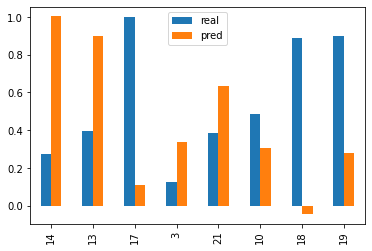

In [ ]:
#Selecting "IVOMD" as the target variable
#Replace "IVOMD" with any other target variables to observe what variables perform better with this model
X1 = X
y = df["IVOMD"]

#Splitting the dataset into training set and testing set.
X1_train, X1_test, y_train, y_test = tts(X1, y, test_size=0.3, random_state=1)

model1 = LinearRegression()
model1.fit(X1_train, y_train)
yhat1 = model1.predict(X1_test)
table1 = pd.DataFrame({"real":y_test, "pred":yhat1})
table1.plot(kind = "bar")

print('The R-Squared error is : ',round(r2(y_test,yhat1),3))

In [ ]:
table1

,real,pred
14,0.271770,1.002508
13,0.398174,0.897969
17,1.000000,0.110629
3,0.127809,0.335770
21,0.386938,0.633520
10,0.487360,0.304979
18,0.888343,-0.045036
19,0.899579,0.280103


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


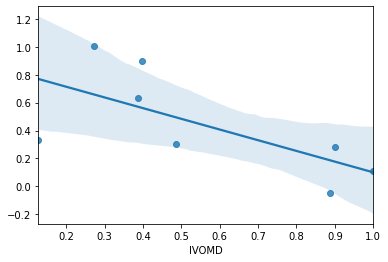

In [ ]:
sns.regplot(y_test,yhat1)

#### b) Using the averaged dataset represented by Xav

The R-Squared error is :  -0.104


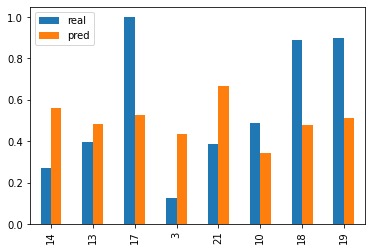

In [ ]:
#Selecting "IVOMD" as the target variable
#Replace "X" with any "Xav" to observe what variables perform better with this model
X1 = Xav
y = df["IVOMD"]

#Splitting the dataset into training set and testing set.
X1_train, X1_test, y_train, y_test = tts(X1, y, test_size=0.3, random_state=1)

model1 = LinearRegression()
model1.fit(X1_train, y_train)
yhat1 = model1.predict(X1_test)
table1 = pd.DataFrame({"real":y_test, "pred":yhat1})
table1.plot(kind = "bar")

print('The R-Squared error is : ',round(r2(y_test,yhat1),3))

In [ ]:
table1

,real,pred
14,0.271770,0.558045
13,0.398174,0.482142
17,1.000000,0.527566
3,0.127809,0.436325
21,0.386938,0.668569
10,0.487360,0.341854
18,0.888343,0.480222
19,0.899579,0.510450


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


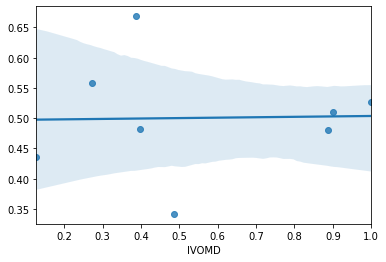

In [ ]:
sns.regplot(y_test,yhat1)

#### Observation
By doing this, it is observed that some target variables perform better with Xav than with X.
Notice that for the X linear model, IVOMD and IVDMD both had R2 scores of -2.967 and -3.68 respectively which are really poor values. However, by using Xab, the linear model for IVOMD and IVDMD produced R2 scores of -0.104 and 0.056 respectively. These are better R2 scores as the goal is to obtain an R2 score that is very close to 1.


#### NB: 
The models in this analysis can be improved significantly by adding more samples to the dataset. Currently, there are only 25 samples to work with.

### Model 2: Using XGB regression model
#### a) using the averaged dataset represented by Xav

[19:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The R-Squared error is :  -0.473


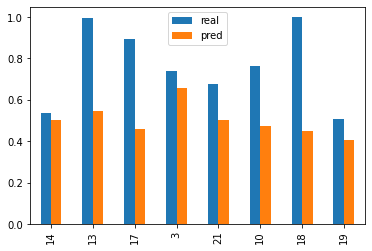

In [ ]:
# To fit the XGBoost model, we have to make the target variable a single variable and not a dataframe of 4 variables. Hence
# we create new variables x2 and y2 just for the purpose of xgboost model alone

X2 = Xav
y2 = df["ADF"]

# splitting the new x2 and y2 into train and test sets
X2_train, X2_test, y2_train, y2_test= tts(X2, y2, train_size= 0.7, random_state= 1)

# initializing
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# fit XGBoost model
xg_reg.fit(X2_train,y2_train)

#predict
yhat2 = xg_reg.predict(X2_test)
table2a = pd.DataFrame({"real":y2_test, "pred":yhat2})
table2a.plot(kind = "bar")

print('The R-Squared error is : ',round(r2(y_test,yhat2),3))

In [ ]:
table2a

,real,pred
14,0.534247,0.502410
13,0.994521,0.545842
17,0.895890,0.456670
3,0.739726,0.658693
21,0.676712,0.502410
10,0.764384,0.472687
18,1.000000,0.449428
19,0.509589,0.406013


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


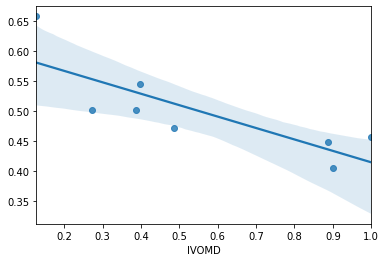

In [ ]:
sns.regplot(y_test,yhat2)

#### b)  Repeating the XGB regression model using the un-averaged dataset represented by X

[19:58:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The R-Squared error is :  -0.581


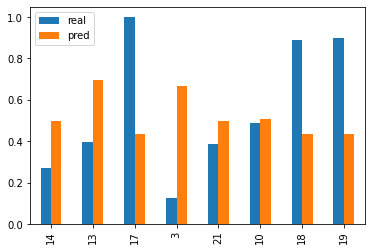

In [ ]:
# To fit the XGBoost model, we have to make the target variable a single variable and not a dataframe of 4 variables. Hence
# we create new variables x2 and y2 just for the purpose of xgboost model alone
X2 = X
y2 = df["IVOMD"]

# splitting the new X2 and y2 into train and test sets
X2_train, X2_test, y2_train, y2_test= tts(X2, y2, train_size= 0.7, random_state= 1)

# fit XGBoost model
xg_reg.fit(X2_train,y2_train)
#predict
yhat2 = xg_reg.predict(X2_test)
table2b = pd.DataFrame({"real":y2_test, "pred":yhat2})
table2b.plot(kind = "bar")

print('The R-Squared error is : ',round(r2(y_test,yhat2),3))

In [ ]:
table2b

,real,pred
14,0.271770,0.497509
13,0.398174,0.697045
17,1.000000,0.435952
3,0.127809,0.667875
21,0.386938,0.497509
10,0.487360,0.507222
18,0.888343,0.435952
19,0.899579,0.435952


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


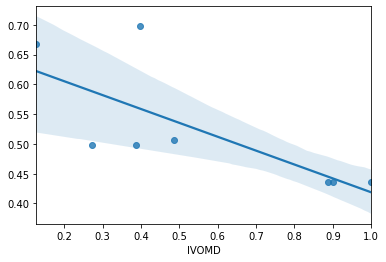

In [ ]:
sns.regplot(y_test,yhat2)

### Model 3: Using Decision Tree Model
#### a) Using the normal dataset represented bt X

In [ ]:
X3 = X 
y = df["IVOMD"]

The R-Squared error is :  -1.543


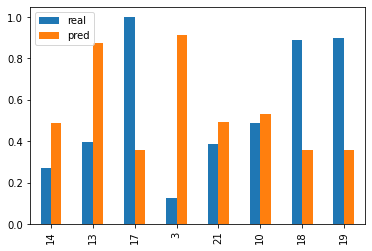

In [ ]:
X3_train, X3_test, y3_train, y3_test= tts(X3, y, train_size= 0.7, random_state= 1)

#Initializing the model
dtree = DecisionTreeRegressor(random_state=2)

# fitting model
dtree.fit(X3_train,y3_train)

#predicting the model
yhat3 = dtree.predict(X3_test)
table3a = pd.DataFrame({"real":y3_test, "pred":yhat3})
table3a.plot(kind = "bar")

print('The R-Squared error is : ',round(r2(y3_test,yhat3),3))

In [ ]:
table3a

,real,pred
14,0.271770,0.489466
13,0.398174,0.875702
17,1.000000,0.356039
3,0.127809,0.915028
21,0.386938,0.495084
10,0.487360,0.530899
18,0.888343,0.356039
19,0.899579,0.356039


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


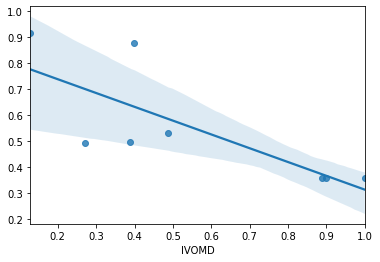

In [ ]:
sns.regplot(y3_test,yhat3)

#### b) Using the averaged dataset represented by Xav

In [ ]:
X3 = Xav
y = df["IVDMD"]

The R-Squared error is :  -1.415


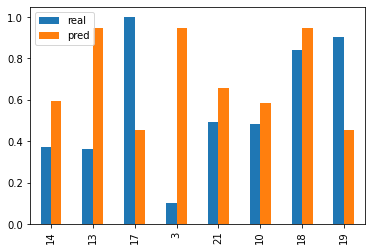

In [ ]:
X3_train, X3_test, y3_train, y3_test= tts(X3, y, train_size= 0.7, random_state= 1)

#Initializing the model
dtree = DecisionTreeRegressor(random_state=2)

# fitting model
dtree.fit(X3_train,y3_train)

#predicting the model
yhat3 = dtree.predict(X3_test)
table3b = pd.DataFrame({"real":y3_test, "pred":yhat3})
table3b.plot(kind = "bar")

print('The R-Squared error is : ',round(r2(y3_test,yhat3),3))

In [ ]:
table3b

,real,pred
14,0.372881,0.592373
13,0.363559,0.946610
17,1.000000,0.454237
3,0.100847,0.946610
21,0.491525,0.658475
10,0.483051,0.586441
18,0.841525,0.946610
19,0.900847,0.454237


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


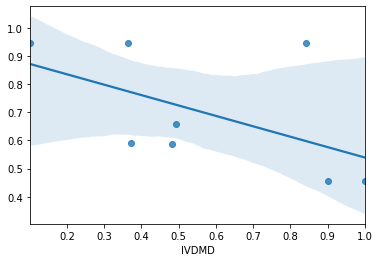

In [ ]:
sns.regplot(y3_test,yhat3)

### Model 4: Using Polynomial regression
#### a) Using the normal dataset represented by X

In [ ]:
x = X[[999.9]]
y = df["IVOMD"]

In [ ]:
#X4_train, X4_test, y4_train, y4_test= tts(x, y, train_size= 0.7, random_state= 1)
X4_train, X4_test, y4_train, y4_test= tts(x, y, test_size= 0.10, random_state= 42, shuffle = True)

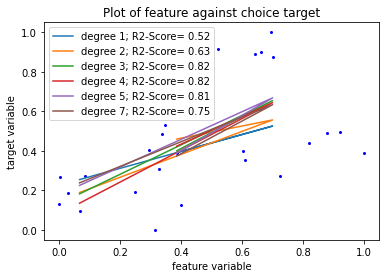

In [ ]:
for degree in [1,2,3,4,5,7]:
    model4 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model4.fit(X4_train, y4_train)
    y4_plot = model4.predict(X4_test)
    plt.plot(X4_test, y4_plot, 
             label = "degree %d" %degree+ "; R2-Score= %.2f"%model4.score(X4_test, y4_test))
    plt.scatter(x,y, s=2, c="blue", alpha=.6)

plt.title("Plot of feature against choice target")
plt.xlabel("feature variable")
plt.ylabel("target variable")
plt.legend(loc = "upper left")
plt.show()

It is observed that R2 has increased from 0.52 to 0.82 where it gets saturated and begins to depriciate. Hence, a prefered model would be the polynomial model of the degree 3 since it has the optimum R2 score. The graph below shows the curve of the polynomial model of degree 3. The main limitation of this model is that it can only handle univariate analysis ie it can only predict values for a specied target variable given a specified feature/input variable.

0.47053018764241106


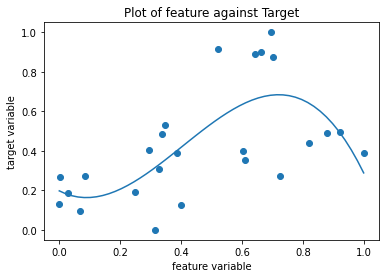

In [ ]:
#Specifying target and feature variables of choice
x_ = X[999.9]
y = df["IVOMD"]
poly_ = np.poly1d(np.polyfit(x_,y,3))
myline = np.linspace(0,1 )
print(r2(y, poly_(x_)))
plt.scatter(x_,y)
plt.plot(myline, poly_(myline))

plt.xlabel("feature variable")
plt.ylabel("target variable")
plt.title("Plot of feature against Target")
plt.show()

#### Observations:

1.   The polynomial model has the best performance but is only possible for a univariate analysis.
2.   For a multivariate analysis, the Decision Tree Model is recommended.
3.   The XGBoost model was not a good fit in predicting any target.
2.   Although the Linear model was not a generally good model, it was however a very good model for predicting one of the target parameters, NDF.

### Conclusion:
We can see that each model performed better and a particular target variable, but not on another. For this reason, different models have been made available by this project to enable flexibility in choosing the best model for each of the tartget parameters.

